In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [279]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read datasets

In [280]:
index_path = '/content/drive/MyDrive/mat421/index.csv'
listing_path = '/content/drive/MyDrive/mat421/listing.csv'

In [281]:
house = pd.read_csv(index_path)
listing = pd.read_csv(listing_path)

In [282]:
house

,date,price index
0,4/1/1977,42.72
1,7/1/1977,43.80
2,10/1/1977,46.26
3,1/1/1978,47.58
4,4/1/1978,49.35
...,...,...
174,10/1/2020,335.83
175,1/1/2021,350.64
176,4/1/2021,379.48
177,7/1/2021,412.14


In [283]:
listing

,date,listing count
0,7/1/2016,17834
1,8/1/2016,17328
2,9/1/2016,17462
3,10/1/2016,18713
4,11/1/2016,19273
...,...,...
64,11/1/2021,6129
65,12/1/2021,5483
66,1/1/2022,4533
67,2/1/2022,3970


In [284]:
house.dtypes

date            object
price index    float64
dtype: object

In [285]:
listing.dtypes

date             object
listing count     int64
dtype: object

In [286]:
house['date'] = pd.to_datetime(house['date'])

In [287]:
listing['date'] = pd.to_datetime(listing['date'])

In [288]:
house.dtypes

date           datetime64[ns]
price index           float64
dtype: object

In [289]:
listing.dtypes

date             datetime64[ns]
listing count             int64
dtype: object

#Statistics

In [290]:
house.describe()

,price index
count,179.000000
mean,153.728883
std,83.312668
min,42.720000
25%,89.570000
50%,128.920000
75%,208.945000
max,434.090000


In [291]:
listing.describe()

,listing count
count,69.000000
mean,12360.144928
std,5106.448297
min,3809.000000
25%,7186.000000
50%,14406.000000
75%,16698.000000
max,19273.000000


#Time Dummy

In [292]:
house['time'] = np.arange(len(house.index))

In [293]:
house

,date,price index,time
0,1977-04-01,42.72,0
1,1977-07-01,43.80,1
2,1977-10-01,46.26,2
3,1978-01-01,47.58,3
4,1978-04-01,49.35,4
...,...,...,...
174,2020-10-01,335.83,174
175,2021-01-01,350.64,175
176,2021-04-01,379.48,176
177,2021-07-01,412.14,177


In [294]:
listing['time'] = np.arange(len(listing.index))

In [295]:
listing

,date,listing count,time
0,2016-07-01,17834,0
1,2016-08-01,17328,1
2,2016-09-01,17462,2
3,2016-10-01,18713,3
4,2016-11-01,19273,4
...,...,...,...
64,2021-11-01,6129,64
65,2021-12-01,5483,65
66,2022-01-01,4533,66
67,2022-02-01,3970,67


#Plot both datasets

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

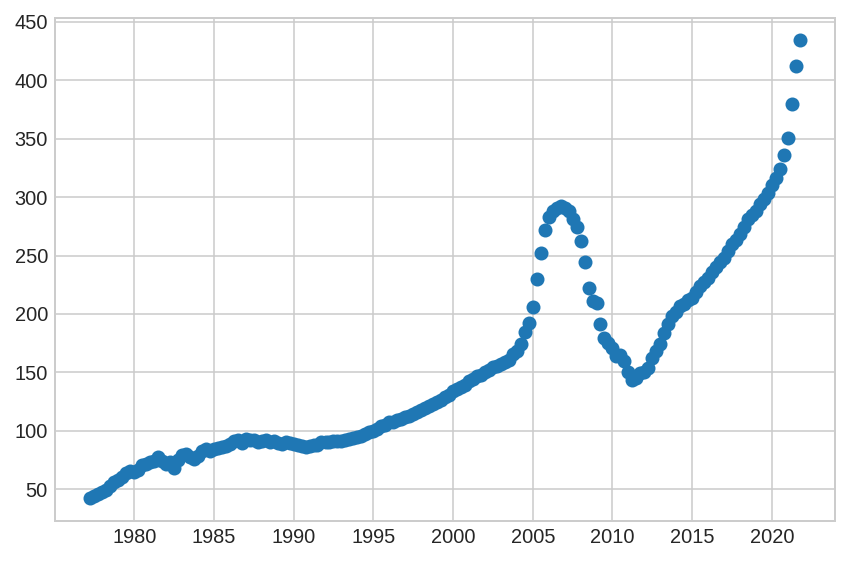

In [297]:
plt.scatter(house['date'], house['price index'])
plt.show()

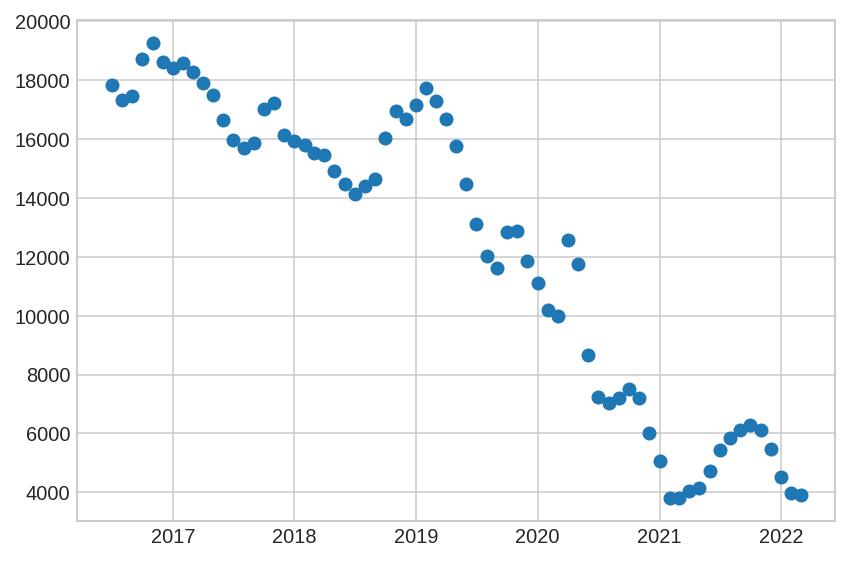

In [298]:
plt.scatter(listing['date'], listing['listing count'])
plt.show()

#Merge datasets

In [299]:
joined = pd.merge(house, listing, on='date',how='left')
cl= joined.drop('time_y', axis =1).dropna()
cl

,date,price index,time_x,listing count
157,2016-07-01,240.17,157,17834.0
158,2016-10-01,244.28,158,18713.0
159,2017-01-01,247.79,159,18429.0
160,2017-04-01,254.27,160,17903.0
161,2017-07-01,259.60,161,15975.0
162,2017-10-01,263.05,162,17023.0
163,2018-01-01,268.87,163,15925.0
164,2018-04-01,274.70,164,15474.0
165,2018-07-01,281.54,165,14142.0
166,2018-10-01,284.54,166,16047.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


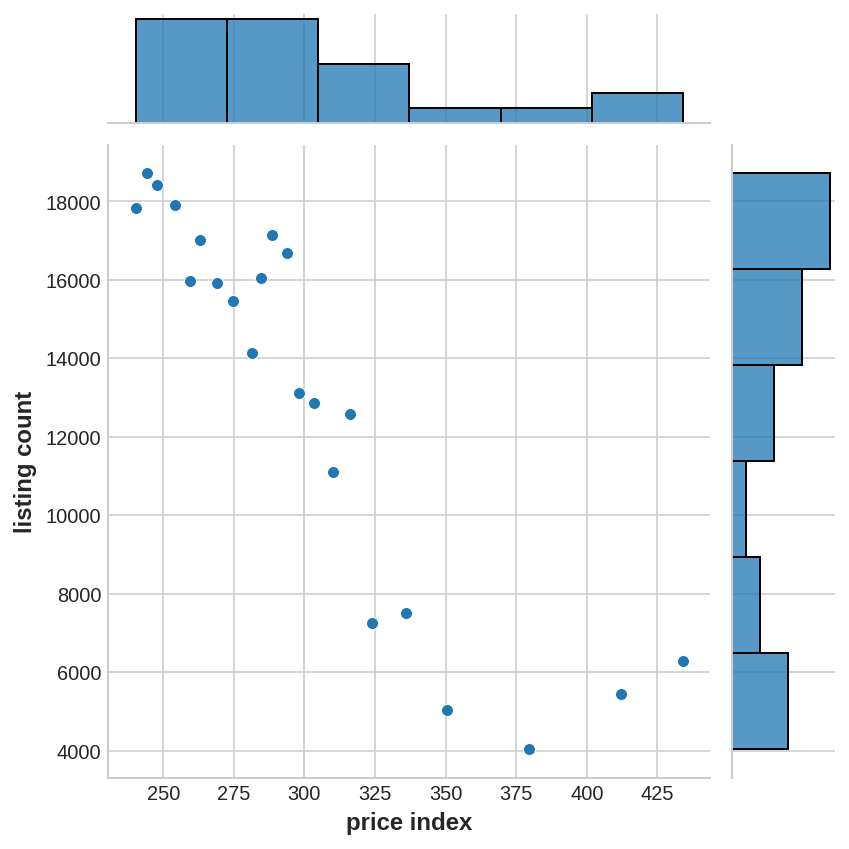

In [300]:
sns.jointplot(cl['price index'], cl['listing count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


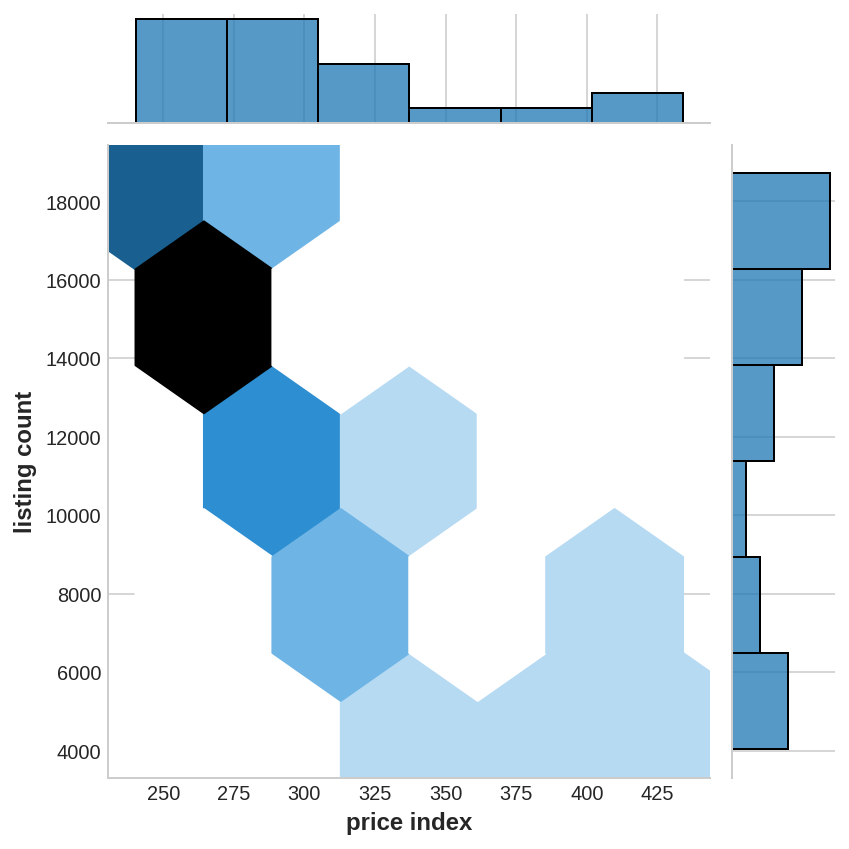

In [301]:
sns.jointplot(cl['price index'], cl['listing count'],kind='hex')

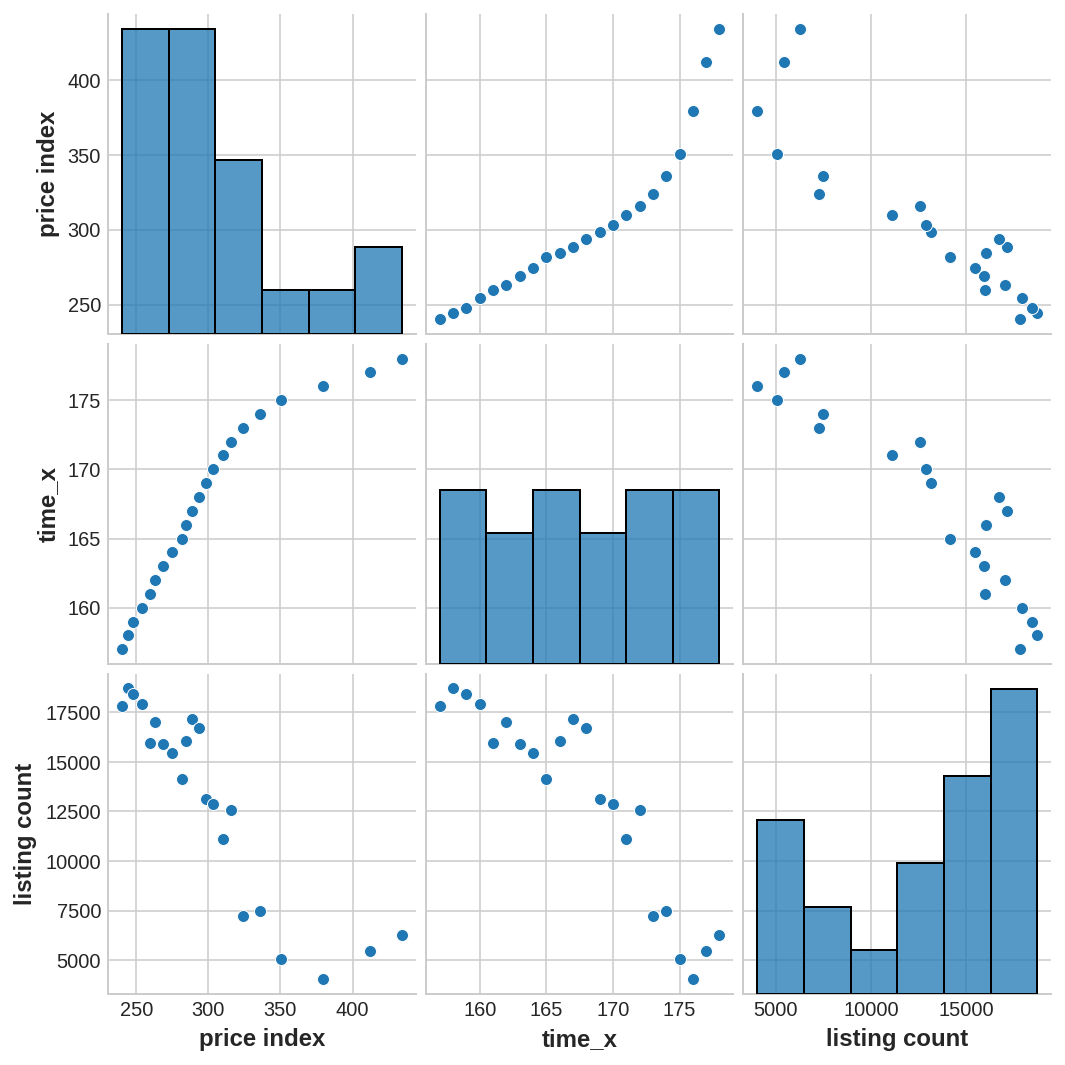

In [302]:
sns.pairplot(cl)

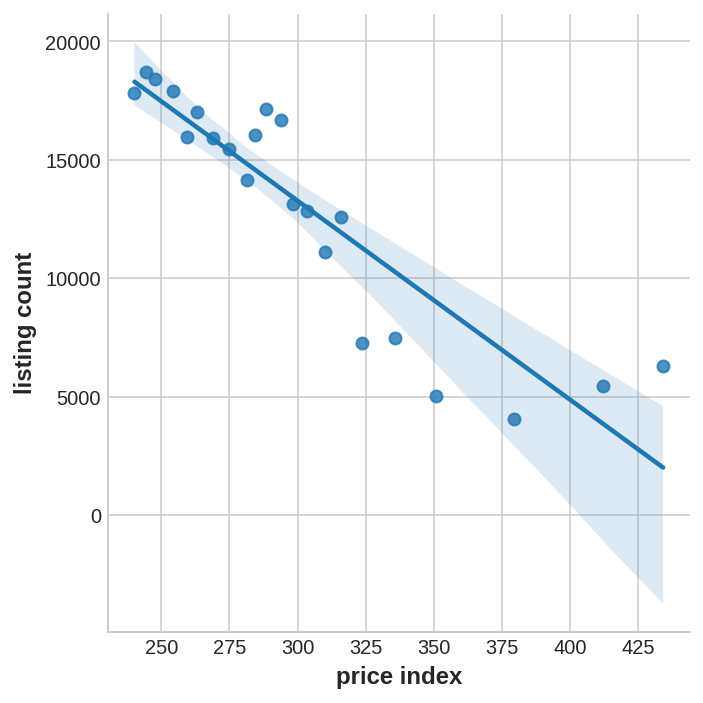

In [303]:
sns.lmplot(x='price index',y ='listing count', data=cl)

#Linear Regression

##Listing count

In [304]:
X= cl.loc[:, ['time_x']]
y= cl.loc[:, ['listing count']]

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [306]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [307]:
print('Coefficients:', model.coef_)

Coefficients: [[-567.85903614]]


In [308]:
print('intercept:', model.intercept_)

intercept: [108739.76024096]


In [309]:
predictions = model.predict(X_test)
predictions

array([[ 8228.71084337],
       [12771.58313253],
       [ 9364.42891566],
       [19018.03253012],
       [ 7660.85180723],
       [ 8796.56987952]])

Text(0, 0.5, 'Predicted Y')

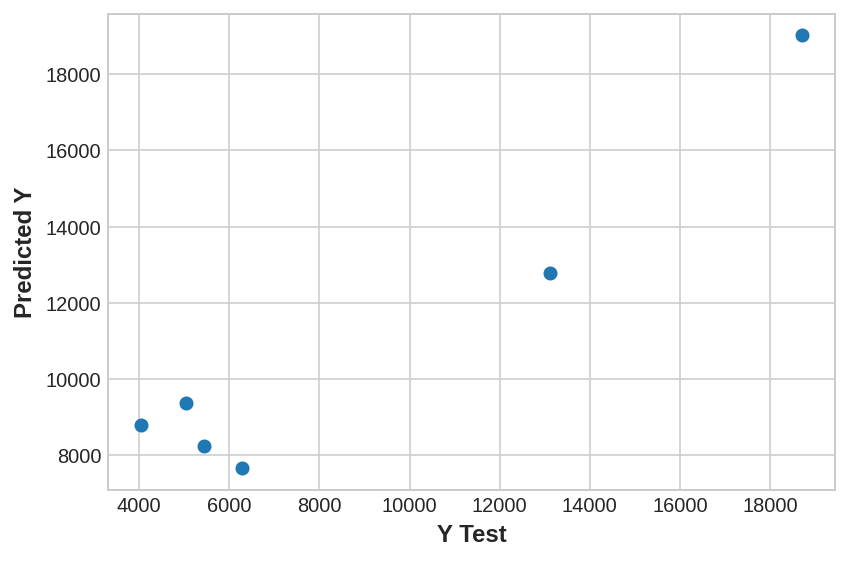

In [310]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [311]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2313.3351405622475
MSE: 8509552.649194112
RMSE: 2917.1137532146586


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


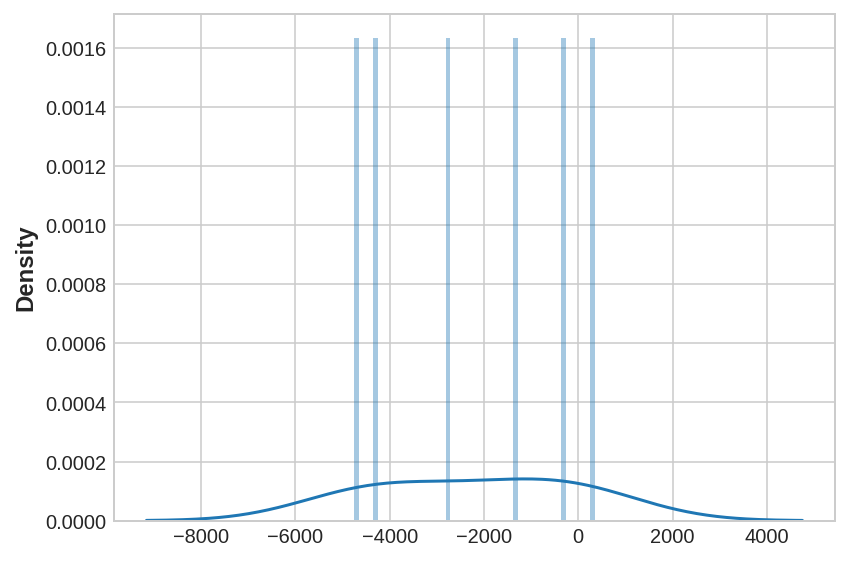

In [312]:
sns.distplot((y_test-predictions),bins=50);

##Price index

In [313]:
M= cl.loc[:, ['time_x']]
n= cl.loc[:, ['price index']]

In [314]:
from sklearn.model_selection import train_test_split
M_train, M_test, n_train, n_test = train_test_split(M, n)

In [315]:
from sklearn.linear_model import LinearRegression

# Train the model
model3 = LinearRegression()
model3.fit(M_train, n_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [316]:
print('Coefficients:', model3.coef_)

Coefficients: [[7.72566261]]


In [317]:
print('intercept:', model3.intercept_)

intercept: [-987.93419551]


In [318]:
predictions3 = model3.predict(M_test)
predictions3

array([[286.80013564],
       [317.70278609],
       [356.33109916],
       [302.25146087],
       [294.52579825],
       [263.6231478 ]])

Text(0, 0.5, 'Predicted Y')

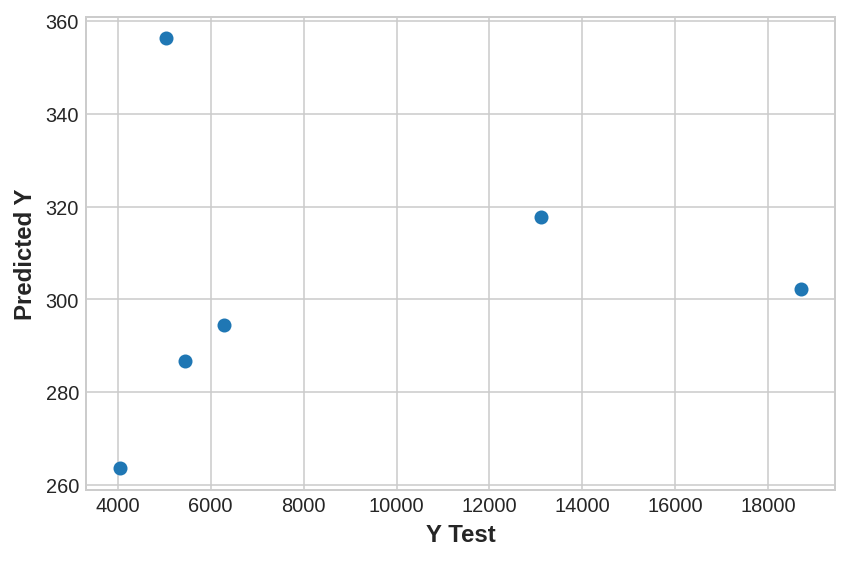

In [319]:
plt.scatter(y_test,predictions3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [320]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

MAE: 8472.627595364307
MSE: 100277632.0107738
RMSE: 10013.871978948691


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


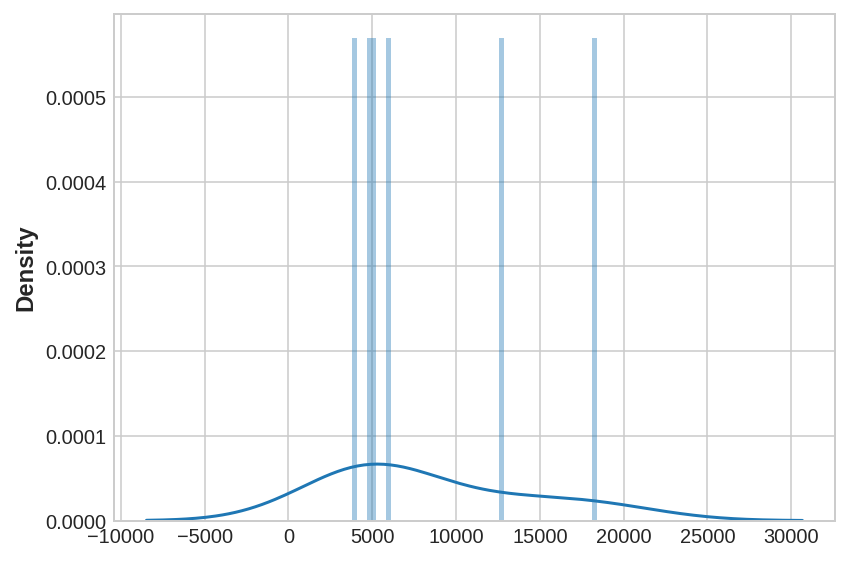

In [321]:
sns.distplot((y_test-predictions3),bins=50);

##PI vs LC


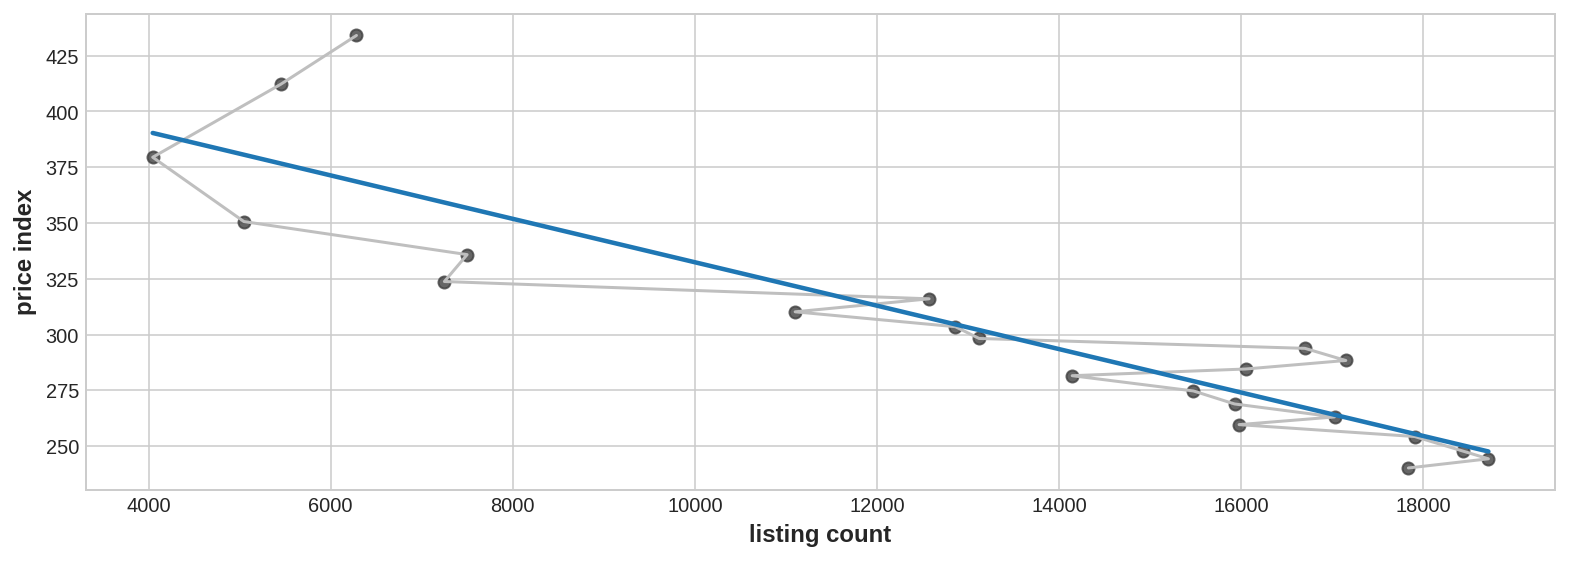

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('listing count', 'price index', data=cl, color='0.75')
ax = sns.regplot(x='listing count', y='price index', data=cl, ci=None, scatter_kws=dict(color='0.25'))


In [323]:
a= cl.loc[:, ['listing count']]
b= cl.loc[:, ['price index']]

In [324]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b)

In [325]:
from sklearn.linear_model import LinearRegression

# Train the model
model2 = LinearRegression()
model2.fit(a_train, b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [326]:
print('Coefficients:', model2.coef_)

Coefficients: [[-0.01041707]]


In [327]:
print('intercept:', model2.intercept_)

intercept: [439.71894344]


In [328]:
predictions2 = model2.predict(a_test)
predictions2

array([[253.94086317],
       [253.22208513],
       [261.09739233],
       [305.75538438],
       [387.1439759 ],
       [247.74270472]])

Text(0, 0.5, 'Predicted Y')

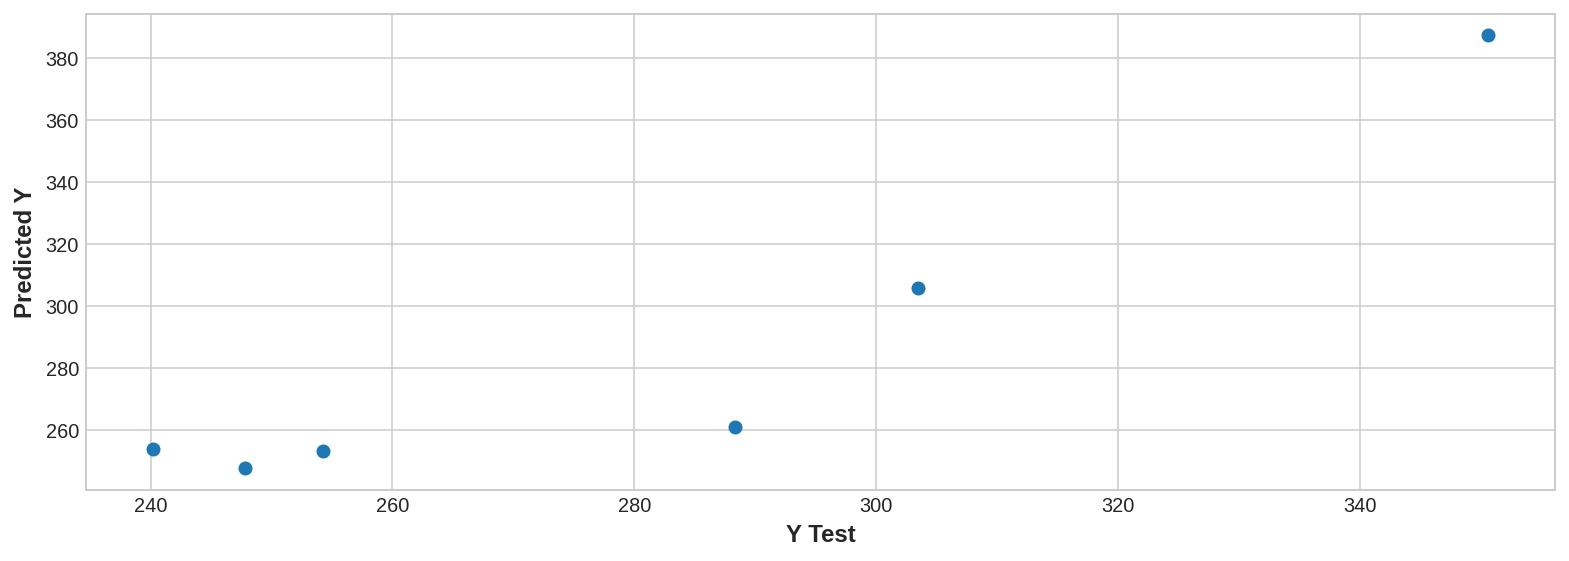

In [329]:
plt.scatter(b_test,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [330]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(b_test, predictions2))
print('MSE:', metrics.mean_squared_error(b_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(b_test, predictions2)))

MAE: 13.481340210271895
MSE: 378.6023044311828
RMSE: 19.457705528432246


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


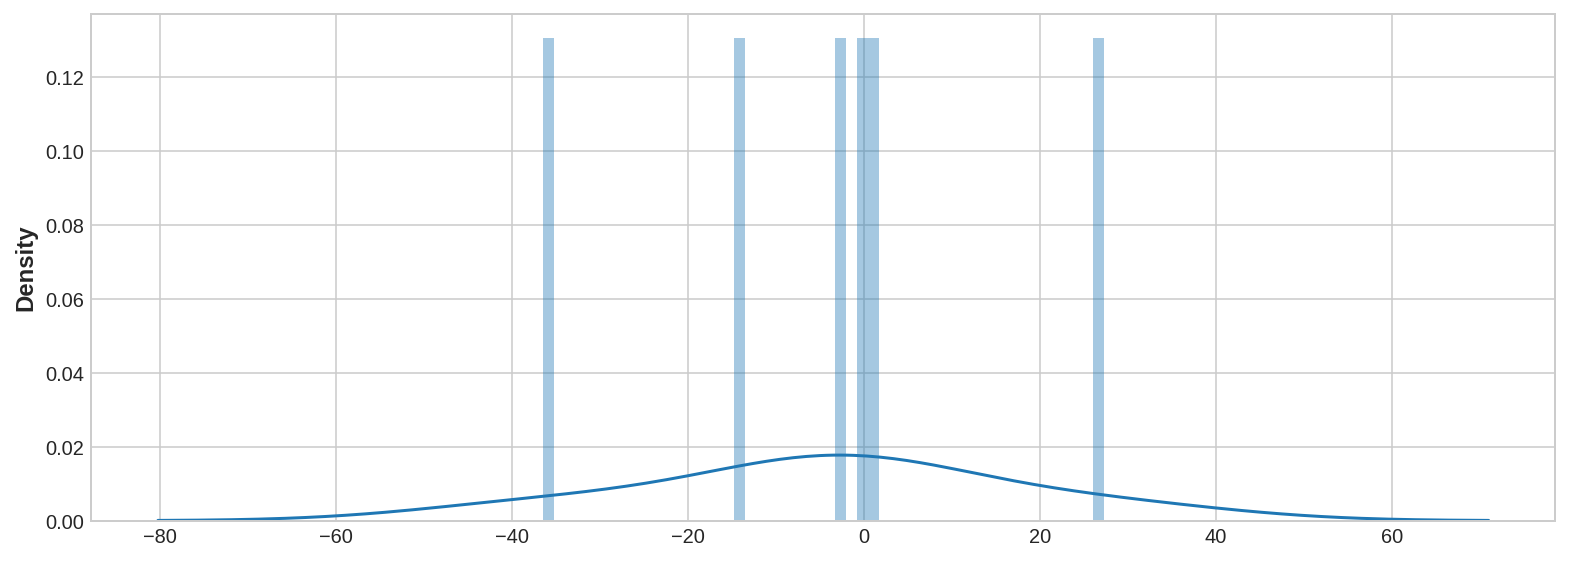

In [331]:
sns.distplot((b_test-predictions2),bins=50);